<a href="https://colab.research.google.com/github/Eswa2020/Data-analysis-and-wrangling-various-projects/blob/master/supermarket_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.loading libraries and dataset

In [1]:
#importimg our libraries to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
%matplotlib inline

In [2]:
#let's load the  dataset
supaq=pd.read_csv("/content/Supermarket Transaction.csv",encoding='ISO-8859-1')
supaq.head(2)

,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
0,1,12/18/2014,7223,F,S,Y,2,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,$27.38
1,2,12/20/2014,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,USA,Food,Produce,Vegetables,5,$14.90


In [3]:
supaq.tail()

,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
14054,14055,12/29/2016,9102,F,M,Y,2,$10K - $30K,Bremerton,WA,USA,Food,Baking Goods,Baking Goods,3,$9.64
14055,14056,12/29/2016,4822,F,M,Y,3,$10K - $30K,Walla Walla,WA,USA,Food,Frozen Foods,Vegetables,3,$7.45
14056,14057,12/31/2016,250,M,S,Y,1,$30K - $50K,Portland,OR,USA,Drink,Beverages,Pure Juice Beverages,4,$3.24
14057,14058,12/31/2016,6153,F,S,N,4,$50K - $70K,Spokane,WA,USA,Drink,Dairy,Dairy,2,$4.00
14058,14059,12/31/2016,3656,M,S,N,3,$50K - $70K,Portland,OR,USA,Non-Consumable,Household,Electrical,5,$25.53


In [4]:
supaq.shape

(14059, 16)

In [ ]:
supaq.dtypes

Transaction            int64
Purchase Date         object
Customer ID            int64
Gender                object
Marital Status        object
Homeowner             object
Children               int64
Annual Income         object
City                  object
State or Province     object
Country               object
Product Family        object
Product Department    object
Product Category      object
Units Sold             int64
Revenue               object
dtype: object

In [ ]:
supaq.describe()

,Transaction,Customer ID,Children,Units Sold
count,14059.000000,14059.000000,14059.000000,14059.000000
mean,7030.000000,5116.902127,2.530336,4.080589
std,4058.628052,2920.755202,1.491852,1.174421
min,1.000000,3.000000,0.000000,1.000000
25%,3515.500000,2549.000000,1.000000,3.000000
50%,7030.000000,5060.000000,3.000000,4.000000
75%,10544.500000,7633.000000,4.000000,5.000000
max,14059.000000,10280.000000,5.000000,8.000000


In [ ]:
#from above
#we have 2 interger columns
#purchase date and revenue columns need to be changed the datatypes
#we dont have any null values/missing values
#we have 14059 rows and 16 columns

##2.Data cleaning

In [ ]:
#start by dropping columns that are irrelevant to our study or have no use in supermarket data
# Dropping columns 'B' and 'C'
columns_to_drop = ['Transaction', 'Customer ID']
supaq.drop(columns=columns_to_drop, inplace=True)

# Displaying the DataFrame after dropping columns
print("\nDataFrame after dropping columns:")
print(supaq)


DataFrame after dropping columns:
      Purchase Date Gender Marital Status Homeowner  Children  Annual Income  \
0        12/18/2014      F              S         Y         2    $30K - $50K   
1        12/20/2014      M              M         Y         5    $70K - $90K   
2        12/21/2014      F              M         N         2    $50K - $70K   
3        12/21/2014      M              M         Y         3    $30K - $50K   
4        12/22/2014      F              S         Y         3  $130K - $150K   
...             ...    ...            ...       ...       ...            ...   
14054    12/29/2016      F              M         Y         2    $10K - $30K   
14055    12/29/2016      F              M         Y         3    $10K - $30K   
14056    12/31/2016      M              S         Y         1    $30K - $50K   
14057    12/31/2016      F              S         N         4    $50K - $70K   
14058    12/31/2016      M              S         N         3    $50K - $70K   

    

In [ ]:
#next we change the column revenue and column purchase date to the right datatypes
#we start with purchase date to date data type
invalid_dates2 = supaq[pd.to_datetime(supaq['Purchase Date'], dayfirst=True, errors='coerce').isna()]

<ipython-input-8-b44d07ad383f>:3: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  invalid_dates2 = supaq[pd.to_datetime(supaq['Purchase Date'], dayfirst=True, errors='coerce').isna()]


In [ ]:
#next we change the column revenue and column purchase date to the right datatypes
#we start with purchase date to date data type
invalid_dates = supaq[pd.to_datetime(supaq['Purchase Date'], dayfirst=False, errors='coerce').isna()]

In [ ]:
print(invalid_dates['Purchase Date'])

631    2/29/2015
632    2/29/2015
633    2/29/2015
634    2/29/2015
635    2/29/2015
636    2/29/2015
637    2/29/2015
638    2/29/2015
639    2/29/2015
640    2/29/2015
641    2/29/2015
642    2/29/2015
Name: Purchase Date, dtype: object


In [ ]:
#next we change revenue column which has  dollar sign to numeric datatype
supaq['Revenue'] = supaq['Revenue'].str.replace("$", '').astype(float)


In [ ]:
supaq.tail(2)

,Purchase Date,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
14057,12/31/2016,F,S,N,4,$50K - $70K,Spokane,WA,USA,Drink,Dairy,Dairy,2,4.00
14058,12/31/2016,M,S,N,3,$50K - $70K,Portland,OR,USA,Non-Consumable,Household,Electrical,5,25.53


In [ ]:
supaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase Date       14059 non-null  object 
 1   Gender              14059 non-null  object 
 2   Marital Status      14059 non-null  object 
 3   Homeowner           14059 non-null  object 
 4   Children            14059 non-null  int64  
 5   Annual Income       14059 non-null  object 
 6   City                14059 non-null  object 
 7   State or Province   14059 non-null  object 
 8   Country             14059 non-null  object 
 9   Product Family      14059 non-null  object 
 10  Product Department  14059 non-null  object 
 11  Product Category    14059 non-null  object 
 12  Units Sold          14059 non-null  int64  
 13  Revenue             14059 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.5+ MB


In [ ]:
# after doing data cleaning confirm there are no missing values and have changed
# data types to relevant data type we go ahead and do our univariate data
# analyis %% [markdown] #3.univariate Data Analysis %% value counts for column
# anuual income for dataset above

#3.univariate Data Analysis

In [ ]:
#value counts for column anuual income for dataset above

annual_income_value_counts = supaq['Annual Income'].value_counts()
print(annual_income_value_counts)


Annual Income
$30K - $50K      4601
$10K - $30K      3090
$50K - $70K      2370
$70K - $90K      1709
$130K - $150K     760
$110K - $130K     643
$90K - $110K      613
$150K +           273
Name: count, dtype: int64


In [ ]:
#generate value counts with percentages for above categorical columns in dataset supaq

for col in ['Product Category', 'Gender', 'City', 'Marital Status', 'Homeowner']:
  print(f"\n--- {col} ---")
  counts = supaq[col].value_counts(normalize=True)
  for value, percent in zip(counts.index, counts.values):
    print(f"{value}: {percent:.2%}")



--- Product Category ---
Vegetables: 12.29%
Snack Foods: 11.38%
Dairy: 6.42%
Fruit: 5.44%
Meat: 5.41%
Jams and Jellies: 4.18%
Baking Goods: 3.44%
Bread: 3.02%
Breakfast Foods: 2.97%
Canned Soup: 2.87%
Bathroom Products: 2.60%
Beer and Wine: 2.53%
Electrical: 2.53%
Candy: 2.50%
Paper Products: 2.45%
Frozen Desserts: 2.30%
Specialty: 2.06%
Starchy Foods: 1.97%
Hot Beverages: 1.61%
Kitchen Products: 1.54%
Magazines: 1.44%
Eggs: 1.41%
Hygiene: 1.40%
Pizza: 1.38%
Pain Relievers: 1.37%
Cleaning Supplies: 1.34%
Pure Juice Beverages: 1.17%
Carbonated Beverages: 1.10%
Side Dishes: 1.09%
Plastic Products: 1.00%
Drinks: 0.96%
Hardware: 0.92%
Frozen Entrees: 0.84%
Seafood: 0.73%
Cold Remedies: 0.66%
Canned Tuna: 0.62%
Decongestants: 0.60%
Canned Clams: 0.38%
Packaged Vegetables: 0.34%
Candles: 0.32%
Canned Anchovies: 0.31%
Miscellaneous: 0.30%
Canned Sardines: 0.28%
Canned Shrimp: 0.27%
Canned Oysters: 0.25%

--- Gender ---
F: 51.00%
M: 49.00%

--- City ---
Salem: 9.86%
Tacoma: 8.94%
Los Angeles:

In [ ]:
#from the above we observe that most of our customers are female just slightly above male with only 2%
#60% of our customers are homeowners where slightly over 51% are married and are demographically ditributed  from all our cities
#with highest being salem which is highest with just 9.8%
#Most bought product category is vegetables and snack foods with a combined percentage of slighly above 23%
#And least but not last above 30% of our customers have annual income of between 30K to 50K

####Categorical visuals

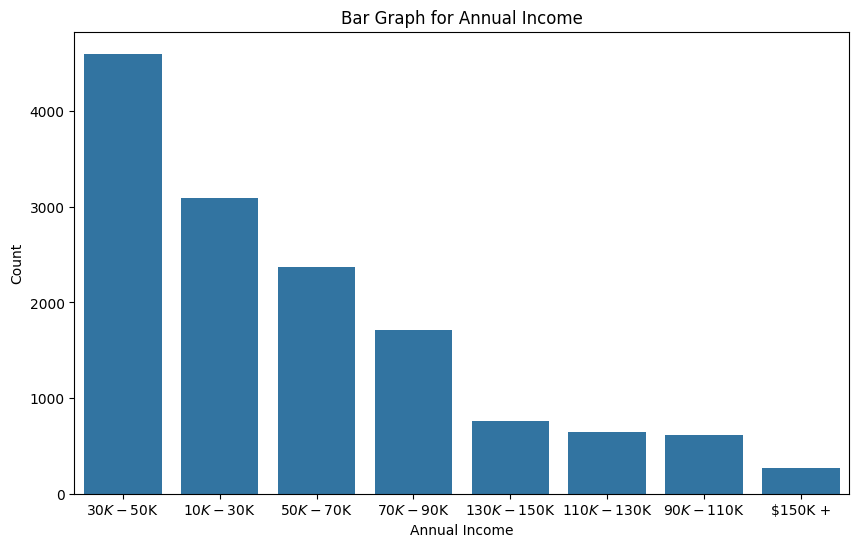

In [ ]:
# generate for me the above bar graphs and pie charts where applicable and use seaborn for better visuals

import matplotlib.pyplot as plt
# Bar graphs for categorical columns
plt.figure(figsize=(10, 6))
sns.barplot(x=annual_income_value_counts.index, y=annual_income_value_counts.values)
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.title("Bar Graph for Annual Income")
plt.show()

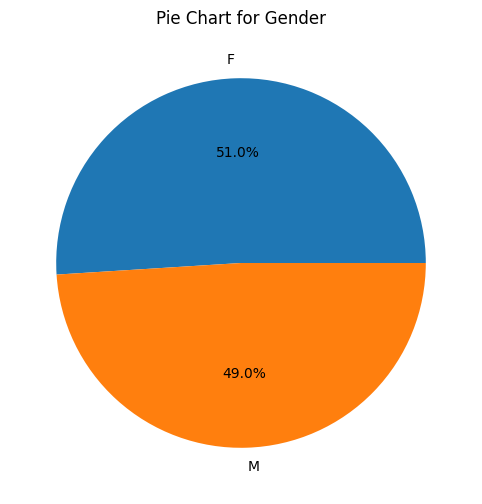

In [ ]:
# Pie charts for categorical columns
plt.figure(figsize=(8,6))
plt.pie(supaq['Gender'].value_counts().values, labels=supaq['Gender'].value_counts().index, autopct="%1.1f%%")
plt.title("Pie Chart for Gender")
plt.show()


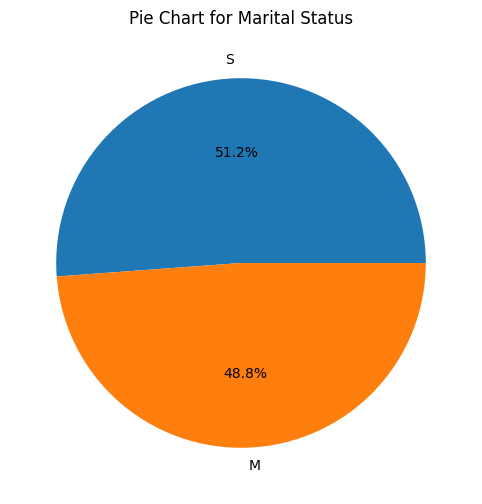

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(supaq['Marital Status'].value_counts().values, labels=supaq['Marital Status'].value_counts().index, autopct="%1.1f%%")
plt.title("Pie Chart for Marital Status")
plt.show()

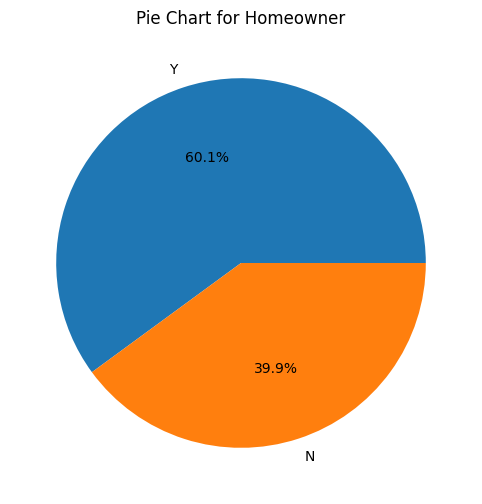

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(supaq['Homeowner'].value_counts().values, labels=supaq['Homeowner'].value_counts().index, autopct="%1.1f%%")
plt.title("Pie Chart for Homeowner")
plt.show()

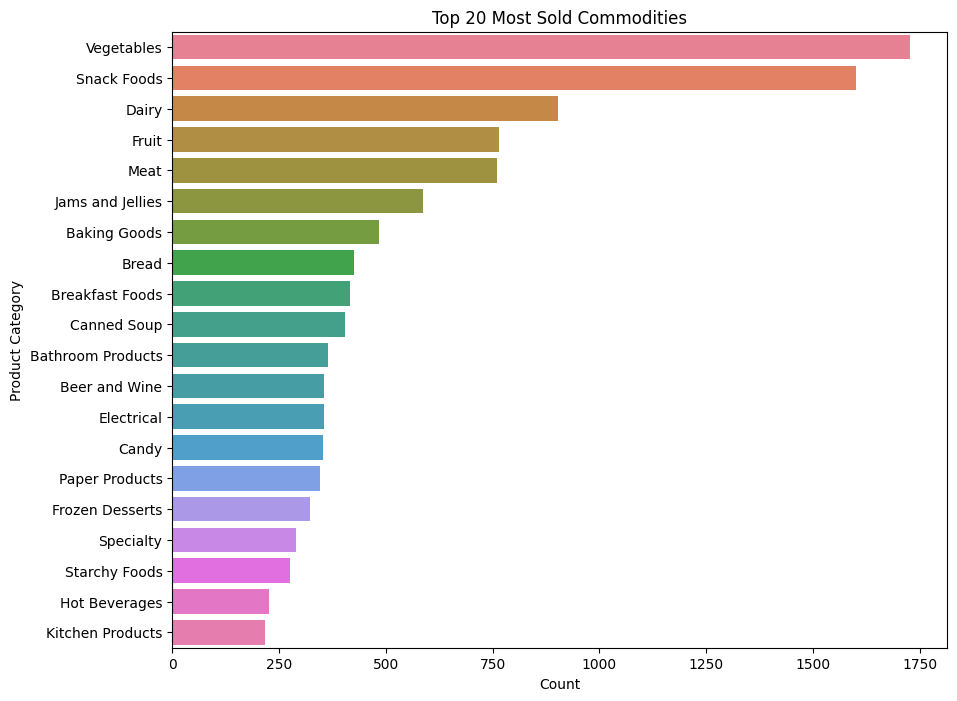

In [ ]:
top_20_commodities = supaq['Product Category'].value_counts().nlargest(20)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_commodities.values, y=top_20_commodities.index, hue=top_20_commodities.index, legend=False)
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.title("Top 20 Most Sold Commodities")
plt.show()

####Numerical visuals and counts

In [ ]:
supaq.columns

Index(['Purchase Date', 'Gender', 'Marital Status', 'Homeowner', 'Children',
       'Annual Income', 'City', 'State or Province', 'Country',
       'Product Family', 'Product Department', 'Product Category',
       'Units Sold', 'Revenue'],
      dtype='object')

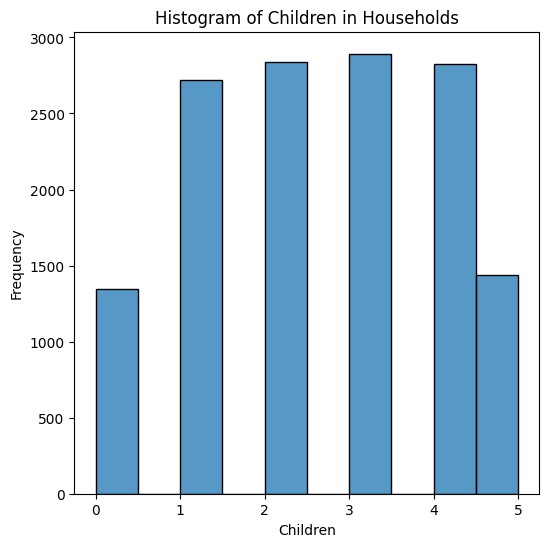

In [ ]:
#generate histograms for above numerical variables for dataset abpve

import matplotlib.pyplot as plt
# Histograms for numerical variables
plt.figure(figsize=(6,6))
sns.histplot(data=supaq, x="Children", bins=10)
plt.xlabel("Children")
plt.ylabel("Frequency")
plt.title("Histogram of Children in Households")
plt.show()

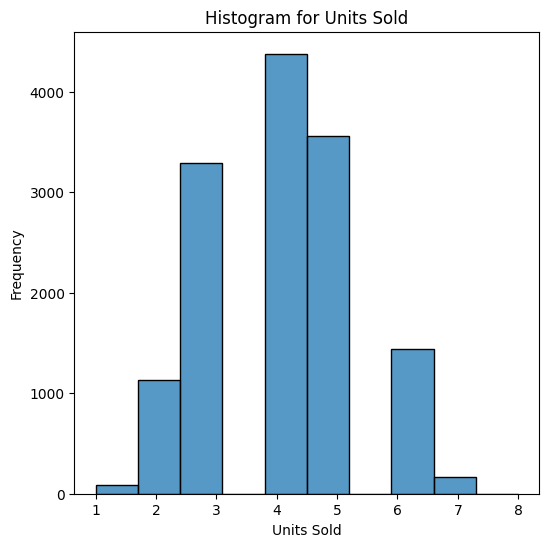

In [ ]:
#generate histograms for above numerical variables for dataset abpve

import matplotlib.pyplot as plt
# Histograms for numerical variables
plt.figure(figsize=(6,6))
sns.histplot(data=supaq, x="Units Sold", bins=10)
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.title("Histogram for Units Sold")
plt.show()

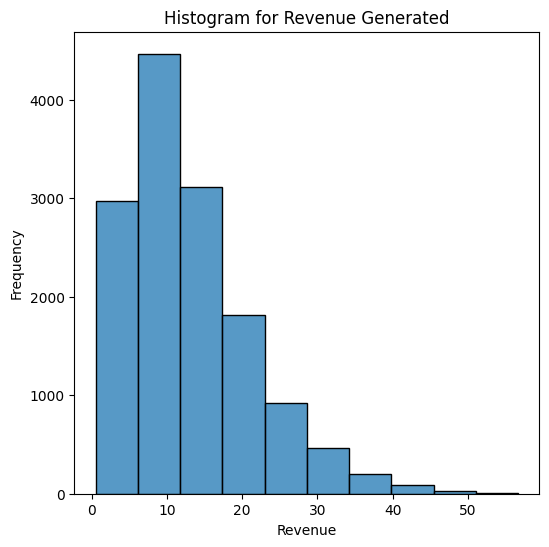

In [ ]:
#generate histograms for above numerical variables for dataset abpve
import matplotlib.pyplot as plt
# Histograms for numerical variables
plt.figure(figsize=(6,6))
sns.histplot(data=supaq, x="Revenue", bins=10)
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.title("Histogram for Revenue Generated")
plt.show()

#4.Bivariate Analysis

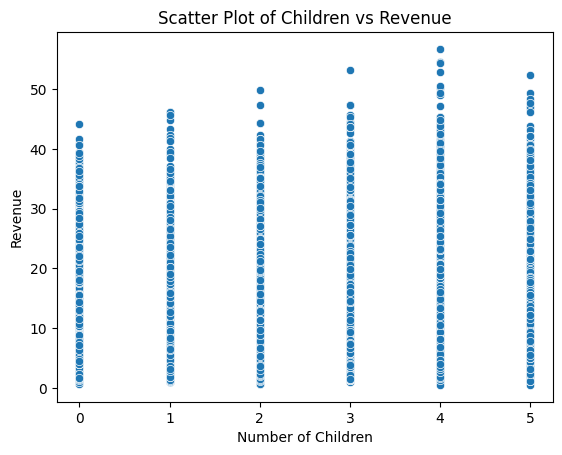

In [ ]:
#a scatter plot for children and  revenue

import matplotlib.pyplot as plt
sns.scatterplot(x='Children', y='Revenue', data=supaq)
plt.xlabel('Number of Children')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Children vs Revenue')
plt.show()


In [ ]:
#pearsons corelation coefficient

import pandas as pd

# Calculate the Pearson correlation coefficient
correlation = supaq['Children'].corr(supaq['Revenue'])

# Print the correlation coefficient
print(f"Pearson correlation coefficient: {correlation}")


Pearson correlation coefficient: 0.06945403638230664


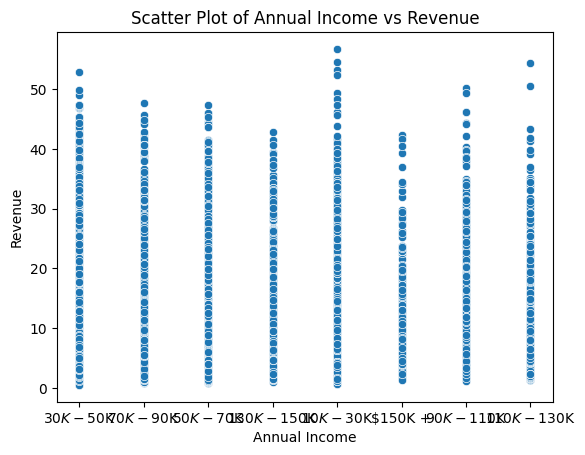

In [ ]:
# a scatter plot for revenue and annual income

import matplotlib.pyplot as plt
sns.scatterplot(x='Annual Income', y='Revenue', data=supaq)
plt.xlabel('Annual Income')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Annual Income vs Revenue')
plt.show()


In [ ]:
supaq.columns

In [ ]:
# pearsons correlation coefficient for the above

import pandas as pd
import numpy as np

# Calculate the Pearson correlation coefficient
correlation = supaq['Units'].corr(supaq['Revenue'])

# Print the correlation coefficient
print(f"Pearson correlation coefficient: {correlation}")


TypeError: unsupported operand type(s) for /: 'str' and 'int'